In [1]:
#https://www.analyticsvidhya.com/blog/2021/07/performing-multi-class-classification-on-fifa-dataset-using-keras/

from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np 

C:\Users\ayan1\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ayan1\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\ayan1\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, AlphaDropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from keras.layers.pooling import GlobalAveragePooling1D
from keras.utils.vis_utils import plot_model

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)

In [5]:
columns = ['Sedentary', 'LPA', 'MPA', 'VPA', 'Steps', 'active']
df = pd.read_csv(r'MOX2_5_data_labelled.csv')
df = df[columns]

X, y = df.iloc[:, :-1], df.iloc[:, -1]

#OR
#dataset = df.values
#X = dataset[:,0:5].astype(float)
#Y = dataset[:,5]

In [6]:
...
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1293, 5) (324, 5) (1293, 5) (324, 5)


In [8]:
'''
from keras import backend as K

def accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.cast(y_pred < border, y_true.dtype)))

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall)/(precision + recall + K.epsilon()))
    
'''

'\nfrom keras import backend as K\n\ndef accuracy(y_true, y_pred):\n    return K.mean(K.equal(y_true, K.cast(y_pred < border, y_true.dtype)))\n\ndef recall_m(y_true, y_pred):\n    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))\n    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))\n    recall = true_positives / (possible_positives + K.epsilon())\n    return recall\n\ndef precision_m(y_true, y_pred):\n    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))\n    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))\n    precision = true_positives / (predicted_positives + K.epsilon())\n    return precision\n\ndef f1_m(y_true, y_pred):\n    precision = precision_m(y_true, y_pred)\n    recall = recall_m(y_true, y_pred)\n    return 2 * ((precision * recall)/(precision + recall + K.epsilon()))\n    \n'

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 5)                 85        
                                                                 
Total params: 2,405
Trainable params: 2,405
Non-trainabl

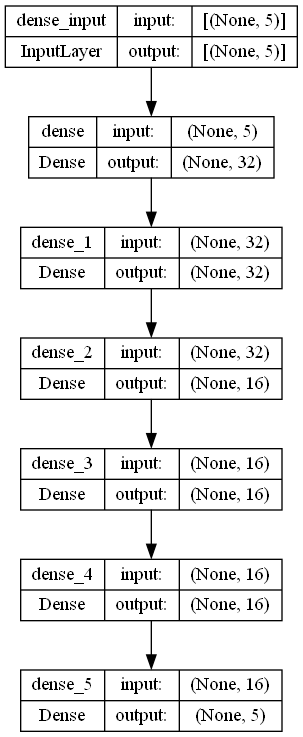

In [9]:
# define model
# create model
model = Sequential()
model.add(Dense(32, input_dim=5, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
print(model.summary())
dot_img_file1 = 'model_1.png'
plot_model(model, to_file = dot_img_file1, show_shapes=True, show_layer_names=True)

In [10]:
'''
# define model
# create model
model = Sequential()
model.add(Dense(64, input_dim=5, activation='selu'))
model.add(AlphaDropout(0.2))
model.add(Dense(32, activation='selu'))
model.add(AlphaDropout(0.2))
model.add(Dense(16, activation='selu'))
model.add(AlphaDropout(0.2))
model.add(Dense(8, activation='selu'))
model.add(AlphaDropout(0.2))
model.add(Dense(3, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
print(model_m.summary())
'''

"\n# define model\n# create model\nmodel = Sequential()\nmodel.add(Dense(64, input_dim=5, activation='selu'))\nmodel.add(AlphaDropout(0.2))\nmodel.add(Dense(32, activation='selu'))\nmodel.add(AlphaDropout(0.2))\nmodel.add(Dense(16, activation='selu'))\nmodel.add(AlphaDropout(0.2))\nmodel.add(Dense(8, activation='selu'))\nmodel.add(AlphaDropout(0.2))\nmodel.add(Dense(3, activation='softmax'))\n# Compile model\nmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) \nprint(model_m.summary())\n"

In [11]:
'''
#https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/
#https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

n_timesteps, n_features, n_outputs = 136, 5, 2

print(n_timesteps, n_features, n_outputs)

model = Sequential()
model.add(Conv1D(100, 10, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(100, 10, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(160, 10, activation='relu'))
model.add(Conv1D(160, 10, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.2))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
'''

"\n#https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/\n#https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf\nfrom matplotlib import pyplot\nfrom keras.models import Sequential\nfrom keras.layers import Dense\nfrom keras.layers import Flatten\nfrom keras.layers import Dropout\nfrom keras.layers.convolutional import Conv1D\nfrom keras.layers.convolutional import MaxPooling1D\n\nn_timesteps, n_features, n_outputs = 136, 5, 2\n\nprint(n_timesteps, n_features, n_outputs)\n\nmodel = Sequential()\nmodel.add(Conv1D(100, 10, activation='relu', input_shape=(n_timesteps, n_features)))\nmodel.add(Conv1D(100, 10, activation='relu'))\nmodel.add(MaxPooling1D(2))\nmodel.add(Conv1D(160, 10, activation='relu'))\nmodel.add(Conv1D(160, 10, activation='relu'))\nmodel.add(GlobalAveragePooling1D())\nmodel.add(Dropout(0.2))\nmodel.add(Dense(n_outputs, activation='softmax'))\nmodel.compile

In [12]:
'''
#https://machinelearningmastery.com/how-to-develop-rnn-models-for-human-activity-recognition-time-series-classification/
from keras.layers import LSTM

n_timesteps, n_features, n_outputs = 136, 5, 3

model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_m.summary())
'''

"\n#https://machinelearningmastery.com/how-to-develop-rnn-models-for-human-activity-recognition-time-series-classification/\nfrom keras.layers import LSTM\n\nn_timesteps, n_features, n_outputs = 136, 5, 3\n\nmodel = Sequential()\nmodel.add(LSTM(100, input_shape=(n_timesteps,n_features)))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(100, activation='relu'))\nmodel.add(Dense(n_outputs, activation='softmax'))\nmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])\nprint(model_m.summary())\n"

In [13]:
'''
from keras.layers import TimeDistributed

model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
print(model_m.summary())
'''

"\nfrom keras.layers import TimeDistributed\n\nmodel = Sequential()\nmodel.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))\nmodel.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))\nmodel.add(TimeDistributed(Dropout(0.5)))\nmodel.add(TimeDistributed(MaxPooling1D(pool_size=2)))\nmodel.add(TimeDistributed(Flatten()))\nmodel.add(LSTM(100))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(100, activation='relu'))\nmodel.add(Dense(n_outputs, activation='softmax'))\nprint(model_m.summary())\n"

In [14]:
print(X_train.shape)
print(y_train.shape)
history = model.fit(X_train, y_train, verbose=0, epochs=1000, validation_split = 0.05, callbacks = [rlrop])

(1293, 5)
(1293, 5)


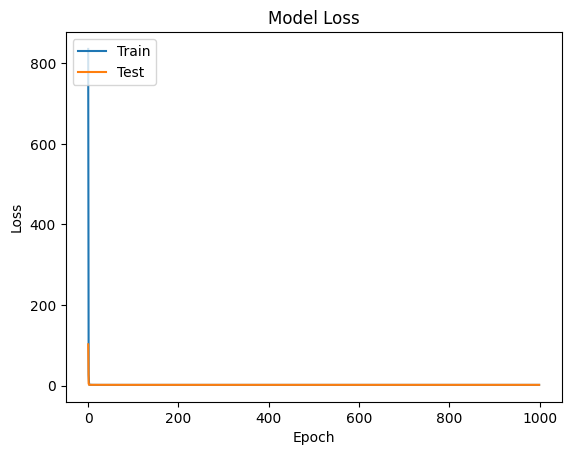

In [15]:
# Loss History
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('mlp_moxdata.png', dpi=300)
plt.show()

In [16]:
predict_x=model.predict(X_test) 
y_pred_class=np.argmax(predict_x,axis=1)

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
confusion_matrix(y_test_class, y_pred_class)

11/11 [==============================] - 0s 1ms/step


array([[  0,   0,   0,   0,  41],
       [  0,   0,   0,   0,  40],
       [  0,   0,   0,   0,  51],
       [  0,   0,   0,   0,  59],
       [  0,   0,   0,   0, 133]], dtype=int64)

In [17]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        59
           4       0.41      1.00      0.58       133

    accuracy                           0.41       324
   macro avg       0.08      0.20      0.12       324
weighted avg       0.17      0.41      0.24       324



In [18]:
#print(roc_auc_score(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))

print(precision_score(y_test_class, y_pred_class, average='micro'))
print(confusion_matrix(y_test_class, y_pred_class))
print(recall_score(y_test_class, y_pred_class, average='micro'))


[[  0   0   0   0  41]
 [  0   0   0   0  40]
 [  0   0   0   0  51]
 [  0   0   0   0  59]
 [  0   0   0   0 133]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        59
           4       0.41      1.00      0.58       133

    accuracy                           0.41       324
   macro avg       0.08      0.20      0.12       324
weighted avg       0.17      0.41      0.24       324

0.4104938271604938
[[  0   0   0   0  41]
 [  0   0   0   0  40]
 [  0   0   0   0  51]
 [  0   0   0   0  59]
 [  0   0   0   0 133]]
0.4104938271604938


In [19]:
print(accuracy_score(y_test_class, y_pred_class))

0.4104938271604938


In [20]:
cf_matrix = confusion_matrix(y_test_class, y_pred_class)

Text(50.722222222222214, 0.5, 'Actual values ')

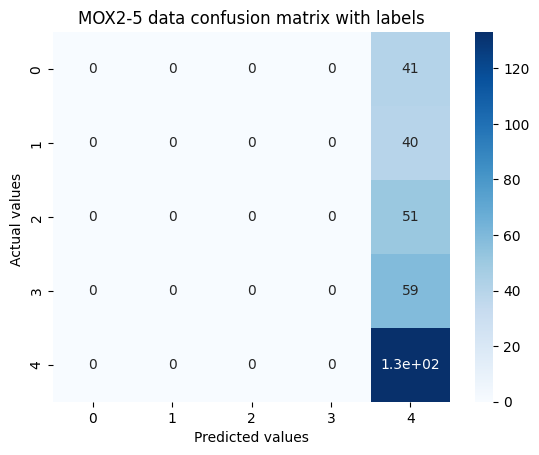

In [21]:
import seaborn as sns 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues') 
ax.set_title('MOX2-5 data confusion matrix with labels') 
ax.set_xlabel('Predicted values') 
ax.set_ylabel('Actual values ') ## Ticket labels - List must be in alphabetical order ax.xaxis.set_ticklabels(['False','True']) ax.yaxis.set_ticklabels(['False','True']) ## Display the visualization of the Confusion Matrix. plt.show()


In [22]:
fig = ax.get_figure()
fig.savefig('mlp_moxdata_confusion.png', dpi=300)